# 🧭 Assignment 6 Workflow: Knock Airport Weather Analysis

This notebook guides you through analysing hourly weather data from Knock Airport, using temperature trends. The dataset is sourced from [Met Éireann](https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv) and includes metadata that must be handled carefully.

## ✅ Workflow Summary

1. **Inspect the raw CSV file manually or programmatically**  
   Preview the file to identify where the actual header begins. This is typically the row starting with `"station"`.

2. **Detect and skip metadata rows**  
   Use Python logic to locate the header row and skip all preceding lines when loading the dataset.

3. **Download and save the file locally**  
   Save the CSV file to a `data/` folder to ensure reproducibility and consistent access throughout the analysis.

4. **Load the dataset from the saved file**  
   Read the file from disk using `pandas.read_csv()` and apply the detected header logic to load the data accurately.

5. **Validate the dataset after loading**  
   Check column names, data types, and missing values to confirm the structure is correct and ready for analysis.

6. **Perform analysis and visualisation**  
   - Plot hourly temperature - this will focus on temperatures between dates 10/07/2025 and 16/07/2025. The hottest week of the year!
   - Calculate and plot daily mean temperature  
   - Calculate and plot monthly mean temperature

📌 Each step is explained in detail throughout the notebook to support your understanding and ensure reproducibility.



## 📘 Step 1: Inspect the Raw CSV File Manually or Programmatically

Before loading the dataset, it's important to understand its structure. The Met Éireann CSV file contains metadata before the actual header row, which can interfere with data loading.

You can inspect the file manually by downloading it from the following URL:

https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv



Open it using your default spreadsheet viewer or a plain text editor. Look for the row that begins with `"station"` — this marks the start of the actual data table.

Alternatively, preview the file programmatically using Python:

```python
import requests
url = "https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv"
response = requests.get(url)
print('\n'.join(response.text.splitlines()[:30]))
```

This will print the first 30 lines of the file, allowing you to identify where the header starts.

📌 Reference: Inspecting the raw structure helps identify metadata rows, delimiters, and header placement before loading the file.

## Step 2: Install Libraries

In [1]:
%pip install ipywidgets
%pip install jinja2

# Import essential libraries
import pandas as pd  # data manipulation : https://pandas.pydata.org/
import requests  # HTTP requests : https://docs.python-requests.org/
from io import StringIO  # in-memory text streams : https://docs.python.org/3/library/io.html#io.StringIO
import os  # operating system functionality : https://docs.python.org/3/library/os.html
import numpy as np  # numerical operations : https://numpy.org/
import seaborn as sns  # statistical data visualisation : https://seaborn.pydata.org/
from datetime import datetime, timedelta  # date and time handling : https://docs.python.org/3/library/datetime.html
import matplotlib.pyplot as plt  # data visualisation : https://matplotlib.org/
import matplotlib.dates as mdates  # datetime axis formatting : https://matplotlib.org/stable/users/prev_whats_new/whats_new_3.1.0.html#dates
from matplotlib.dates import WeekdayLocator, DateFormatter, MO
from matplotlib.table import Table  # table creation in plots : https://matplotlib.org/stable/api/table_api.html
from ipywidgets import interact, widgets  # interactive sliders/dropdowns : https://ipywidgets.readthedocs.io/
from IPython.display import display, HTML  # display HTML in notebooks : https://ipython.readthedocs.io/en/stable/api/generated/IPython.display.html
from pathlib import Path  # modern, object-oriented way to handle file system paths : https://docs.python.org/3/library/pathlib.html



Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


## 🔍 Step 3: Detect and Skip Metadata Rows  

To ensure the dataset is loaded correctly, we need to locate the actual header row and skip any preceding metadata. This step uses Python logic to search for the line that begins with `"station"` or `"date"` and contains commas — a strong indicator of the header.

In [2]:
# Detect header row programmatically
url = "https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv"
response = requests.get(url)
lines = response.text.splitlines()

# Search for the header row
header_index = None
for i, line in enumerate(lines):
    if line.strip().lower().startswith('station') and ',' in line:
        header_index = i
        break

# Fallback: search for any line containing 'date,'
if header_index is None:
    for i, line in enumerate(lines):
        if 'date,' in line.lower():
            header_index = i
            break

# Default to first line if no header is found
if header_index is None:
    print("Warning: header row not found. Defaulting to first line.")
    header_index = 0


## 📁 Step 4: Download and Save the File to Parent-Level `data/` Folder

To keep the workflow reproducible and organised, we save the downloaded CSV file to a `data/` folder located one level above the notebook. This allows us to reuse the file without re-downloading and ensures that all analysis references a consistent local copy.

📌 *Reference: Saving files locally supports reproducibility and version control in data science workflows.*



In [3]:
# Step 3: Save the downloaded file to a parent-level 'data' folder
url = "https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv"
response = requests.get(url)

# Define the correct path to the existing data folder one level up
file_path = "../data/climate_data.csv"

# Save the file
with open(file_path, "w", encoding="utf-8") as f:
    f.write(response.text)

print(f"File saved to: {file_path}")



File saved to: ../data/climate_data.csv


## 📥 Step 5: Load the Dataset from the Saved File

Now that the file is saved locally, we read it from disk and detect the correct header row. This ensures consistent access and avoids repeated downloads.


In [4]:
# Step 5: Read the saved file and detect header row
with open(file_path, "r", encoding="utf-8") as f:
    lines = f.read().splitlines()

# Detect header row
header_index = None
for i, line in enumerate(lines):
    if line.strip().lower().startswith('station') and ',' in line:
        header_index = i
        break

if header_index is None:
    for i, line in enumerate(lines):
        if 'date,' in line.lower():
            header_index = i
            break

if header_index is None:
    print("Warning: header row not found. Defaulting to first line.")
    header_index = 0

# Load the dataset using pandas with low_memory=False
from io import StringIO
csv_text = "\n".join(lines[header_index:])
df = pd.read_csv(StringIO(csv_text), low_memory=False)

# Preview the data
df.head()


,date,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,...,ind.3,wdsp,ind.4,wddir,ww,w,sun,vis,clht,clamt
0,10-apr-1996 14:00,0,0.0,0,11.5,0,8.1,3.9,0.0,0,...,0,0,0,0,25,81,0.0,35000,32,5
1,31-jul-1996 08:00,0,0.0,0,11.5,0,11.1,10.7,0.0,0,...,0,0,0,0,25,82,0.0,40000,45,5
2,31-jul-1996 09:00,0,0.0,0,11.6,0,10.7,9.8,0.0,0,...,0,0,0,0,80,81,0.0,8000,32,7
3,31-jul-1996 10:00,0,0.0,0,12.9,0,11.3,9.8,0.0,0,...,0,0,0,0,25,82,0.0,28000,35,6
4,31-jul-1996 11:00,0,0.0,0,14.5,0,10.8,7.0,0.0,0,...,0,0,0,0,2,11,0.0,40000,40,6


## ✅ Step 6: Validate the Dataset After Loading

After loading the dataset, it's important to confirm that the structure is correct and the data is usable. This includes:

- Checking column names
- Inspecting data types
- Identifying missing values


In [5]:
# Check column names
print("Column names:", df.columns.tolist())

# Check data types
print("\nData types:")
print(df.dtypes)

# Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum())


Column names: ['date', 'ind', 'rain', 'ind.1', 'temp', 'ind.2', 'wetb', 'dewpt', 'vappr', 'rhum', 'msl', 'ind.3', 'wdsp', 'ind.4', 'wddir', 'ww', 'w', 'sun', 'vis', 'clht', 'clamt']

Data types:
date      object
ind        int64
rain      object
ind.1      int64
temp     float64
ind.2      int64
wetb     float64
dewpt    float64
vappr    float64
rhum       int64
msl       object
ind.3      int64
wdsp      object
ind.4      int64
wddir     object
ww        object
w         object
sun      float64
vis       object
clht      object
clamt     object
dtype: object

Missing values per column:
date     0
ind      0
rain     0
ind.1    0
temp     0
ind.2    0
wetb     0
dewpt    0
vappr    0
rhum     0
msl      0
ind.3    0
wdsp     0
ind.4    0
wddir    0
ww       0
w        0
sun      0
vis      0
clht     0
clamt    0
dtype: int64


## Article: Summer of 2025 becomes warmest season on record in Ireland

https://www.irishtimes.com/environment/2025/09/03/summer-of-2025-becomes-warmest-season-on-record-in-ireland/

> **Sustained heat**, especially at night, contributed to higher than normal average temperatures.  
>  
> This summer was **Ireland’s warmest season since records began in 1900**, according to provisional data from **Met Éireann**.  
>  
> **Met Éireann climatologist Paul Moore** said:  
> *“Ireland is experiencing the effects of climate change, and our climate projections show that our climate is going to become warmer.”*

> The hottest week of Summer 2025 in Ireland was July 10–16, with peak temperatures reaching 31°C on Saturday, July 12. This was part of a short-lived heatwave driven by the Azores High, affecting multiple stations including Knock Airport.  

> Knock Airport: Recorded 28.7°C — its highest July temperature on record
> https://www.breakingnews.ie/ireland/july-2025-was-9th-hottest-on-record-with-highest-temperature-of-31-degrees-1789636.html



### Meteorological Seasons in Ireland for 2025

We first define the meteorological seasons for Ireland in 2025:

https://www.met.ie/education/outreach-irish-seasons

In [6]:
# Define meteorological season boundaries for Ireland in 2025
seasons_2025 = {
    "Spring": {
        "start": pd.Timestamp("2025-03-01 00:00"),
        "end": pd.Timestamp("2025-05-31 23:59")
    },
    "Summer": {
        "start": pd.Timestamp("2025-06-01 00:00"),
        "end": pd.Timestamp("2025-08-31 23:59")
    },
    "Autumn": {
        "start": pd.Timestamp("2025-09-01 00:00"),
        "end": pd.Timestamp("2025-11-30 23:59")
    },
    "Winter": {
        "start": pd.Timestamp("2025-12-01 00:00"),
        "end": pd.Timestamp("2026-02-28 23:59")
    }
}

# Optional: print season boundaries
for season, bounds in seasons_2025.items():
    print(f"{season}: {bounds['start'].strftime('%d-%b-%Y %H:%M')} to {bounds['end'].strftime('%d-%b-%Y %H:%M')}")


Spring: 01-Mar-2025 00:00 to 31-May-2025 23:59
Summer: 01-Jun-2025 00:00 to 31-Aug-2025 23:59
Autumn: 01-Sep-2025 00:00 to 30-Nov-2025 23:59
Winter: 01-Dec-2025 00:00 to 28-Feb-2026 23:59


### Define Date Range

We will focus on the hottest week of the year: July 10–16, 2025 by customising date ranges in our analysis.

In [7]:
custom_start = pd.Timestamp("2025-07-10 00:00")
custom_end = pd.Timestamp("2025-07-16 23:59")

## 🧪 Function: Prepare Temperature Data and Display Hourly Pivot Table

This function takes a raw weather dataset and prepares it for time-series analysis. It performs the following steps:

- Cleans column names and identifies the correct datetime and temperature columns.
- Uses robust logic to detect and parse datetime formats, falling back to flexible parsing if needed.
- Validates that the selected date range falls within a defined meteorological season.
- Filters the dataset to the specified date range and extracts hourly temperature readings.
- Creates a pivot table showing hourly temperatures for each day in the range.
- Displays the table with color gradients to highlight temperature variations.

This is useful for visualising daily temperature patterns and spotting anomalies or trends across multiple days.


In [8]:
def prepare_temperature_data(df, start_date, end_date, season_bounds=None):
    # Clean column names
    df = df.copy()
    df.columns = df.columns.str.strip()

    # Identify date column
    date_col = 'date' if 'date' in df.columns else next((c for c in df.columns if 'date' in c.lower()), None)
    if date_col is None and 'datetime' not in df.columns:
        raise KeyError("No 'date' or 'datetime' column found in df.")

    # Robust datetime parsing
    if 'datetime' not in df.columns or not pd.api.types.is_datetime64_any_dtype(df['datetime']):
        if date_col:
            sample_vals = df[date_col].dropna().astype(str).head(80).tolist()
            candidate_formats = [
                '%Y-%m-%d %H:%M:%S', '%Y-%m-%d %H:%M', '%d-%b-%Y %H:%M',
                '%d/%m/%Y %H:%M:%S', '%d/%m/%Y %H:%M', '%d-%m-%Y %H:%M',
                '%d %b %Y %H:%M', '%d %B %Y %H:%M',
            ]
            chosen_fmt = None
            for fmt in candidate_formats:
                parsed_sample = pd.to_datetime(sample_vals, format=fmt, dayfirst=True, errors='coerce')
                if parsed_sample.notna().sum() >= max(1, int(len(sample_vals) * 0.7)):
                    chosen_fmt = fmt
                    break
            if chosen_fmt:
                print(f"Detected datetime format: {chosen_fmt}")
                df['datetime'] = pd.to_datetime(df[date_col], format=chosen_fmt, dayfirst=True, errors='coerce')
            else:
                print("No single datetime format detected; falling back to pandas/dateutil parsing (warning suppressed).")
                import warnings
                with warnings.catch_warnings():
                    warnings.filterwarnings('ignore', message='Could not infer format')
                    df['datetime'] = pd.to_datetime(df[date_col], dayfirst=True, errors='coerce')
        else:
            df['datetime'] = pd.to_datetime(df['datetime'], errors='coerce')

    # Ensure temperature column
    if 'temp' not in df.columns:
        temp_col = next((c for c in df.columns if 'temp' in c.lower()), None)
        if temp_col is None:
            raise KeyError("No 'temp' column found in df.")
        df['temp'] = pd.to_numeric(df[temp_col], errors='coerce')
    else:
        df['temp'] = pd.to_numeric(df['temp'], errors='coerce')

    # Drop missing values
    df = df.dropna(subset=['datetime', 'temp'])

    # Validate date range
    if season_bounds:
        if not (season_bounds["start"] <= start_date <= season_bounds["end"] and
                season_bounds["start"] <= end_date <= season_bounds["end"]):
            raise ValueError("Custom date range must fall within the defined season.")

    # Filter and enrich
    range_df = df[(df['datetime'] >= start_date) & (df['datetime'] <= end_date)].copy()
    range_df['date'] = range_df['datetime'].dt.date
    range_df['hour'] = range_df['datetime'].dt.strftime('%H:%M')

    if range_df.empty:
        print(f"No data found between {start_date} and {end_date}.")
        return None

    # Create pivot table
    pivot = range_df.pivot(index='hour', columns='date', values='temp')
    print("📊 Hourly Temperature Table (°C):")
    display(pivot.style.format("{:.1f}").background_gradient(cmap='YlOrRd', axis=None))

    return range_df


## 📈 Function: Interactive Daily Temperature Plot with Hourly Ledger

This function creates an interactive visualization of hourly temperature data for each day in a selected date range. It enables users to:

- Select a specific date using a slider widget.
- View a line chart of hourly temperature readings for that day.
- See annotations for each temperature point and a horizontal line showing the daily average.
- Print a detailed ledger of hourly temperature values below the chart.

This interactive tool is ideal for exploring daily weather patterns, identifying temperature spikes, and comparing day-to-day variability. It uses `ipywidgets` for interactivity and `matplotlib` for plotting.


In [9]:
def interactive_daily_plot(range_df, save_plots=False, plots_path="plots", show_all=False):
    if range_df is None or range_df.empty:
        print("No data available for plotting.")
        return

    if not pd.api.types.is_object_dtype(range_df['date']):
        range_df['date'] = pd.to_datetime(range_df['date']).dt.date

    date_list = sorted(range_df['date'].unique())

    # Save all plots silently if requested
    if save_plots:
        os.makedirs(plots_path, exist_ok=True)
        for selected_date in date_list:
            day_df = range_df[range_df['date'] == selected_date]
            if day_df.empty:
                continue

            avg_temp = day_df['temp'].mean()

            plt.figure(figsize=(12, 5))
            plt.plot(day_df['datetime'], day_df['temp'], label='Hourly Temperature', color='darkorange', marker='o')
            for x, y in zip(day_df['datetime'], day_df['temp']):
                plt.text(x, y + 0.3, f"{y:.1f}°C", ha='center', va='bottom', fontsize=8)
            plt.axhline(avg_temp, color='blue', linestyle='--', label=f'Average: {avg_temp:.2f} °C')
            plt.title(f"Hourly Temperature – {selected_date} (Knock Airport)")
            plt.xlabel("Date and Time")
            plt.ylabel("Temperature (°C)")
            plt.legend()
            plt.grid(True)
            plt.tight_layout()
            plt.xticks(rotation=45)

            filename = os.path.join(plots_path, f"temperature_{selected_date}.png")
            plt.savefig(filename)
            plt.close()

    # Interactive display for selected date
    def plot_day(selected_date):
        day_df = range_df[range_df['date'] == selected_date]
        if day_df.empty:
            print(f"No data for {selected_date}")
            return

        avg_temp = day_df['temp'].mean()

        plt.figure(figsize=(12, 5))
        plt.plot(day_df['datetime'], day_df['temp'], label='Hourly Temperature', color='darkorange', marker='o')
        for x, y in zip(day_df['datetime'], day_df['temp']):
            plt.text(x, y + 0.3, f"{y:.1f}°C", ha='center', va='bottom', fontsize=8)
        plt.axhline(avg_temp, color='blue', linestyle='--', label=f'Average: {avg_temp:.2f} °C')
        plt.title(f"Hourly Temperature – {selected_date} (Knock Airport)")
        plt.xlabel("Date and Time")
        plt.ylabel("Temperature (°C)")
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.xticks(rotation=45)
        plt.show()

        print(f"\n🧾 Hourly Ledger for {selected_date}:")
        print(day_df[['hour', 'temp']].round(1).to_string(index=False, justify='left', col_space=20))

    print("\n📅 Interactive Daily Charts:")
    interact(plot_day, selected_date=widgets.SelectionSlider(
        options=date_list,
        value=date_list[0],
        description='Select Date',
        continuous_update=False
    ))


## ▶️ Run the Analysis: Prepare and Visualise Summer Temperature Data

This cell executes the full analysis workflow for a selected date range in Summer 2025:

- It calls the `prepare_temperature_data()` function to clean and filter the weather dataset, validate the date range against the summer season, and generate a pivot table of hourly temperatures.
- It then launches the `interactive_daily_plot()` function, which displays an interactive chart for each day in the range, along with a detailed hourly ledger.

This allows users to explore daily temperature patterns at Knock Airport during mid-July 2025, both visually and numerically.


In [10]:
# Create 'plots' directory one level up
plots_dir = os.path.join("..", "plots")
os.makedirs(plots_dir, exist_ok=True)

# Run the analysis and generate all daily plots as PNGs
range_df = prepare_temperature_data(df, custom_start, custom_end, seasons_2025["Summer"])
interactive_daily_plot(range_df, save_plots=True, plots_path=plots_dir)


Detected datetime format: %d-%b-%Y %H:%M
📊 Hourly Temperature Table (°C):
📊 Hourly Temperature Table (°C):


date,2025-07-10,2025-07-11,2025-07-12,2025-07-13,2025-07-14,2025-07-15,2025-07-16
hour,,,,,,,
00:00,13.9,15.5,15.2,19.2,15.5,12.3,11.3
01:00,13.7,14.8,14.7,18.2,15.7,12.8,10.6
02:00,13.6,14.5,15.0,17.2,14.6,12.7,10.2
03:00,13.9,13.5,14.4,16.9,13.6,12.5,10.2
04:00,14.0,12.8,14.3,16.6,13.3,12.5,10.5
05:00,14.0,13.3,13.5,16.6,13.3,12.3,9.6
06:00,14.3,14.1,15.0,17.8,13.1,12.3,11.6
07:00,15.8,15.9,16.7,18.7,13.5,12.6,12.7
08:00,17.0,16.9,19.3,20.5,12.1,13.6,14.0



📅 Interactive Daily Charts:


interactive(children=(SelectionSlider(continuous_update=False, description='Select Date', options=(datetime.da…

## 📅 Manual Date Selection for Static Display

This cell manually selects a date from the dataset and displays the corresponding temperature plot and hourly ledger. It ensures that GitHub renders a visible output, since interactive widgets like sliders are not supported in GitHub's notebook viewer.

**Note on default behaviour:** the manual selection now defaults to the notebook's current `custom_start` value (the start of the defined custom date range). If `custom_start` is not present or cannot be parsed, the cell falls back to 2025-07-12. To change the default, update the `custom_start` / `custom_end` values in the "Define Date Range" cell above or edit the date in this cell directly.

Download the notebook and run it locally to access the full interactivity.

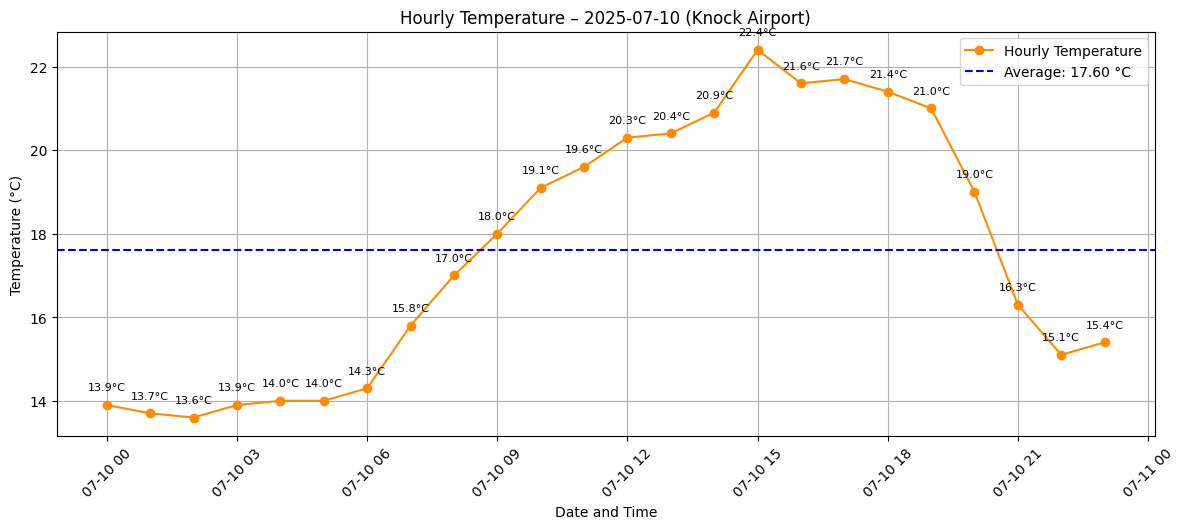


🧾 Hourly Ledger for 2025-07-10:
hour                  temp               
00:00                13.9                
01:00                13.7                
02:00                13.6                
03:00                13.9                
04:00                14.0                
05:00                14.0                
06:00                14.3                
07:00                15.8                
08:00                17.0                
09:00                18.0                
10:00                19.1                
11:00                19.6                
12:00                20.3                
13:00                20.4                
14:00                20.9                
15:00                22.4                
16:00                21.6                
17:00                21.7                
18:00                21.4                
19:00                21.0                
20:00                19.0                
21:00                16.3                
2

In [11]:
# 📌 Manually input a date from the dataset (defaults to the defined custom range)

# If custom_start/custom_end are defined in the notebook, default to custom_start's date.
# Otherwise fall back to a sensible default that was used previously.
if 'custom_start' in globals() and 'custom_end' in globals():
    try:
        input_date = pd.to_datetime(custom_start).date()
    except Exception:
        # If custom_start is already a date-like object
        try:
            input_date = custom_start.date()
        except Exception:
            input_date = datetime(2025, 7, 12).date()
else:
    # Fallback hard-coded date (change this if you prefer a different default)
    input_date = datetime(2025, 7, 12).date()

# Check if range_df is valid before proceeding
if range_df is None:
    print("❌ No data available for the selected date range. Please check your previous steps.")
else:
    # Validate and filter data for the selected date
    if input_date in range_df['date'].unique():
        day_df = range_df[range_df['date'] == input_date]
        avg_temp = day_df['temp'].mean()

        # Plot
        plt.figure(figsize=(12, 5))
        plt.plot(day_df['datetime'], day_df['temp'], label='Hourly Temperature', color='darkorange', marker='o')
        for x, y in zip(day_df['datetime'], day_df['temp']):
            plt.text(x, y + 0.3, f"{y:.1f}°C", ha='center', va='bottom', fontsize=8)
        plt.axhline(avg_temp, color='blue', linestyle='--', label=f'Average: {avg_temp:.2f} °C')
        plt.title(f"Hourly Temperature – {input_date} (Knock Airport)")
        plt.xlabel("Date and Time")
        plt.ylabel("Temperature (°C)")
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.xticks(rotation=45)
        plt.show()

        # Ledger
        print(f"\n🧾 Hourly Ledger for {input_date}:")
        print(day_df[['hour', 'temp']].round(1).to_string(index=False, justify='left', col_space=20))
    else:
        print(f"❌ Date {input_date} not found in dataset.")


## Generate Climate Data Mean Daily Summary (CSV only)

This section computes the daily mean temperature for Summer 2025 and saves it to a CSV file — no plotting.  This file can be used for further analysis or reporting as needed.  The daily mean temperatures are calculated for each day from June 1 to August 31, 2025, and the results are saved in a tidy CSV format.

https://www.met.ie/education/outreach-irish-seasons

In [12]:
# 📅 Define summer bounds
summer = seasons_2025.get('Summer') if 'seasons_2025' in globals() else None
if summer is None:
    raise RuntimeError('seasons_2025 is not defined in the notebook – run the season-definition cell first.')
start = summer['start']
end = summer['end']

# 🧼 Ensure datetime and temperature columns
if 'datetime' not in df.columns or not pd.api.types.is_datetime64_any_dtype(df['datetime']):
    date_col = 'date' if 'date' in df.columns else next((c for c in df.columns if 'date' in c.lower()), None)
    if date_col:
        sample_vals = df[date_col].dropna().astype(str).head(80).tolist()
        candidate_formats = [
            '%Y-%m-%d %H:%M:%S', '%Y-%m-%d %H:%M', '%d-%b-%Y %H:%M',
            '%d/%m/%Y %H:%M:%S', '%d/%m/%Y %H:%M', '%d-%m-%Y %H:%M',
            '%d/%m/%Y', '%Y-%m-%d', '%d-%m-%Y'
        ]
        chosen_fmt = None
        for fmt in candidate_formats:
            parsed_sample = pd.to_datetime(sample_vals, format=fmt, dayfirst=True, errors='coerce')
            if parsed_sample.notna().sum() >= max(1, int(len(sample_vals) * 0.7)):
                chosen_fmt = fmt
                break
        if chosen_fmt:
            print(f"✅ Detected datetime format: {chosen_fmt}")
            df['datetime'] = pd.to_datetime(df[date_col], format=chosen_fmt, dayfirst=True, errors='coerce')
        else:
            print("⚠️ No single datetime format detected; falling back to generic parsing.")
            import warnings
            with warnings.catch_warnings():
                warnings.filterwarnings('ignore', message='Could not infer format')
                df['datetime'] = pd.to_datetime(df[date_col], dayfirst=True, errors='coerce')
    else:
        df['datetime'] = pd.to_datetime(df.iloc[:, 0], dayfirst=True, errors='coerce')

# 🌡️ Ensure temperature column
if 'temp' not in df.columns:
    temp_col = next((c for c in df.columns if 'temp' in c.lower()), None)
    if temp_col:
        df['temp'] = pd.to_numeric(df[temp_col], errors='coerce')
    else:
        raise KeyError('No temperature column found (expected column name containing "temp").')
else:
    df['temp'] = pd.to_numeric(df['temp'], errors='coerce')

# 📊 Filter and compute daily mean
mask = (df['datetime'] >= start) & (df['datetime'] <= end)
summer_df = df.loc[mask].dropna(subset=['datetime','temp']).copy()

if summer_df.empty:
    print(f'No data found between {start} and {end}.')
else:
    summer_df['date_only'] = summer_df['datetime'].dt.date
    daily_mean = summer_df.groupby('date_only', sort=True)['temp'].agg(['count','mean','std']).reset_index()
    daily_mean = daily_mean.rename(columns={'date_only':'date'})
    daily_mean['mean'] = daily_mean['mean'].round(2)
    daily_mean['std'] = daily_mean['std'].round(2)

    # 🧾 Display preview
    try:
        display(daily_mean.head(20))
    except Exception:
        print(daily_mean.head(20).to_string(index=False))

    # 💾 Save to CSV
    out_dir = Path('..') / 'data'
    out_dir.mkdir(parents=True, exist_ok=True)
    out_fp = out_dir / 'climate_data_mean_daily_summer_2025.csv'
    daily_mean.to_csv(out_fp, index=False)
    print(f'Saved daily mean CSV: {out_fp}')


✅ Detected datetime format: %d-%b-%Y %H:%M


,date,count,mean,std
0,2025-06-01,24,11.19,1.85
1,2025-06-02,24,10.45,2.80
2,2025-06-03,24,9.40,1.49
3,2025-06-04,24,10.20,2.74
4,2025-06-05,24,10.28,2.00
5,2025-06-06,24,10.25,2.87
6,2025-06-07,24,9.56,1.75
7,2025-06-08,24,10.24,1.62
8,2025-06-09,24,11.61,1.48
9,2025-06-10,24,12.98,2.78


Saved daily mean CSV: ..\data\climate_data_mean_daily_summer_2025.csv


## 📈 Visualising Mean Temperatures for the Hottest Week of Summer 2025

This section loads the saved daily mean temperature data from CSV and plots values specifically for the hottest week of Summer 2025 — spanning 10th to 17th July. According to [BreakingNews.ie](https://www.breakingnews.ie/ireland/july-2025-was-9th-hottest-on-record-with-highest-temperature-of-31-degrees-1789636.html), July 2025 ranked as the 9th hottest on record, with temperatures peaking at 31°C.

Saved plot: ..\plots\mean_daily_custom_range.png


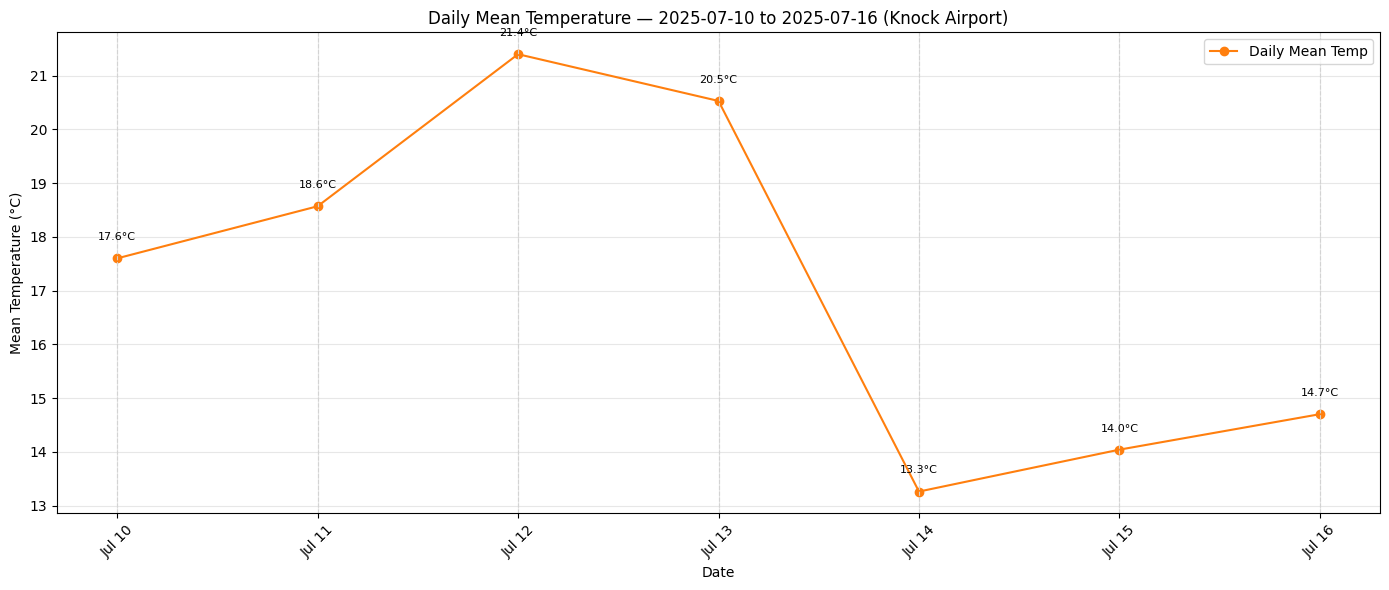


🧾 Daily Mean Ledger (2025-07-10 to 2025-07-16):
date                  mean               
2025-07-10           17.6                
2025-07-11           18.6                
2025-07-12           21.4                
2025-07-13           20.5                
2025-07-14           13.3                
2025-07-15           14.0                
2025-07-16           14.7                


In [18]:
# 📥 Load daily mean CSV
csv_fp = os.path.join("..", "data", "climate_data_mean_daily_summer_2025.csv")
daily_mean = pd.read_csv(csv_fp, parse_dates=['date'])

# 📅 Ensure full date coverage in custom range
full_dates = pd.date_range(custom_start.date(), custom_end.date(), freq='D')
full_df = pd.DataFrame({'date': full_dates})
custom_mean = full_df.merge(daily_mean, on='date', how='left')

if custom_mean.empty or custom_mean['mean'].dropna().empty:
    print(f"No data found between {custom_start.date()} and {custom_end.date()}.")
else:
    # 📈 Plot
    plt.figure(figsize=(14, 6))
    plt.plot(custom_mean['date'], custom_mean['mean'], marker='o', color='tab:orange', label='Daily Mean Temp')

    # Add vertical lines and value labels
    for x, y in zip(custom_mean['date'], custom_mean['mean']):
        if pd.notna(y):
            plt.axvline(x=x, color='lightgray', linestyle='--', linewidth=0.8)
            plt.text(x, y + 0.3, f"{y:.1f}°C", ha='center', va='bottom', fontsize=8)

    # Format x-axis to show every date
    plt.xticks(ticks=custom_mean['date'], labels=custom_mean['date'].dt.strftime('%b %d').tolist(), rotation=45)

    plt.title(f'Daily Mean Temperature — {custom_start.date()} to {custom_end.date()} (Knock Airport)')
    plt.xlabel('Date')
    plt.ylabel('Mean Temperature (°C)')
    plt.grid(True, alpha=0.3)
    plt.legend()
    plt.tight_layout()

    # 💾 Save plot
    plots_dir = os.path.join("..", "plots")
    os.makedirs(plots_dir, exist_ok=True)
    plot_fp = os.path.join(plots_dir, "mean_daily_custom_range.png")
    plt.savefig(plot_fp, dpi=100)
    print(f'Saved plot: {plot_fp}')
    plt.show()

    # 📋 Display ledger
    print(f"\n🧾 Daily Mean Ledger ({custom_start.date()} to {custom_end.date()}):")
    ledger = custom_mean[['date', 'mean']].copy()
    ledger['mean'] = ledger['mean'].round(1)
    print(ledger.to_string(index=False, justify='left', col_space=20))
